In [124]:
from utils.experiment import Experiment, get_experiments
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
from matplotlib import rcParams
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import os
#matplotlib inline
rcParams['figure.figsize'] = (8.0, 6.0)
%load_ext autoreload
%autoreload 2

# adapt to your computer
log_folder = "/Users/hermann/Dropbox/ETH/9_Semester/NeuroBot/RobotNav_SemesterProject/Data/logs"
#log_folder = "/Users/hermann/Dropbox/ETH/9_Semester/NeuroBot/eDVS_event_display_server_udp/logs"
# snap_folder = "/Users/hermann/Dropbox/ETH/9_Semester/NeuroBot/plotting/snapshots"
snap_folder = "/Users/hermann/Dropbox/ETH/9_Semester/NeuroBot/RobotNav_SemesterProject/Data/snapshots"
raw_dir = '/Users/hermann/Dropbox/ETH/9_Semester/NeuroBot/RobotNav_SemesterProject/Plots/raw/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [125]:
# Show available experiments
list(get_experiments(log_folder).keys())

['moving_cup_1.0_2',
 'static_cup_0.5_2',
 'static_cup_0.5',
 'static_cup_10.0_2',
 'light_comparison_less_dark_0.75',
 'static_cup_3.0',
 'static_cup_0.5_5',
 'static_cup_2.0',
 'moving_cup_0.5',
 'light_comparison_less_dark_0.5',
 'office_run',
 'moving_cup_0.5_fast_cup',
 'light_comparison_less_dark_1.0',
 'three_blocks',
 'static_cup_1.0_2',
 'multi_blocks_0.5_2',
 'static_cup_0.5_6',
 'static_cup_2.5',
 'light_comparison_dark_0.75',
 'multi_blocks_1.0',
 'static_cup_0.5_3',
 'moving_cup_1.0_1',
 'static_cup_0.5_4',
 'light_comparison_even_less_dark_0.5',
 'grasshopper',
 'multi_blocks_0.5_1',
 'static_cup_10.0_1',
 'moving_cup_0.5_late_cup',
 'light_comparison_bright_0.75',
 'office_1.0',
 'static_cup_1.0_1',
 'static_cup_1',
 'static_cup_0.5_1',
 'two_blocks',
 'random_parcour',
 'static_cup_1.5',
 'moving_cup_0.5_late_slow']

In [116]:
experiment_title = "two_blocks"
exp = Experiment(experiment_title, log_folder=log_folder)
exp.experiment_name

'two_blocks_20161115T123452'

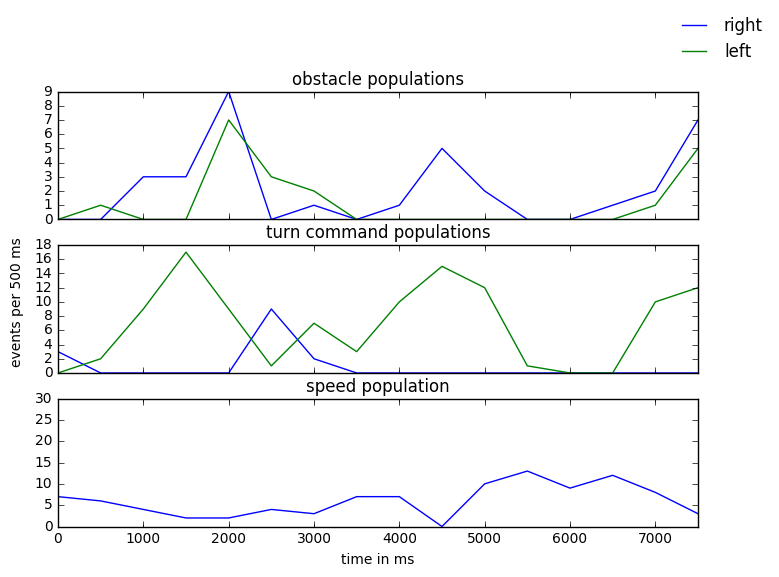

In [117]:
groups = {
    0: range(0,16),
    1: range(16,32),
    2: range(32,48),
    3: range(48,64),
    4: range(64,80),
    5: range(80,88),
}

def get_group(n):
    for k, v in groups.items():
        if n in v:
            return k
        
interval = 500        
        
rolls_frame = exp.df_rolls.copy()
rolls_frame['group'] = rolls_frame['neuron'].apply(get_group)
rolls_frame['time_bin'] = np.floor(rolls_frame['timestamp'] / interval).astype(int) * interval
time_range = range(0,rolls_frame['time_bin'].max(), interval)
# Create a full index that doesn't skipping missing elements and let pandas set those to zero
index = pd.MultiIndex.from_product([groups.keys(), time_range], names=['groups', 'time_bins'])
firing_rates = rolls_frame.groupby(['group', 'time_bin']).size().reindex(index, fill_value=0)
    
gs = gridspec.GridSpec(3, 3)
gs.update(left=0.1, top=0.85)
fig = plt.figure(1)
ax1 = plt.subplot(gs[0, :])
ax1.title.set_text('obstacle populations')
firing_rates[0].plot(label='right', color='b')
firing_rates[1].plot(label='left', color='g')
leg = plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
#leg = plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
#           ncol=2, mode="expand", borderaxespad=0.05)
leg.get_frame().set_linewidth(0.0)
ax2 = plt.subplot(gs[1, :], sharex=ax1)
ax2.set_title('turn command populations')
firing_rates[2].plot(label='right', color='b')
firing_rates[3].plot(label='left', color='g')
ax3 = plt.subplot(gs[2, :], sharex=ax1)
ax3.set_title('speed population')
ax3.set_ylim(0, 30)
firing_rates[4].plot()
ax3.set_xlabel('time in ms')
#plt.tight_layout()
fig.text(0.04, 0.5, 'events per %s ms' % interval, va='center', rotation='vertical')
plt.show()

/Users/hermann/Dropbox/ETH/9_Semester/NeuroBot/eDVS_event_display_server_udp/py3/lib/python3.5/site-packages/ipykernel/__main__.py:40: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/hermann/Dropbox/ETH/9_Semester/NeuroBot/eDVS_event_display_server_udp/py3/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


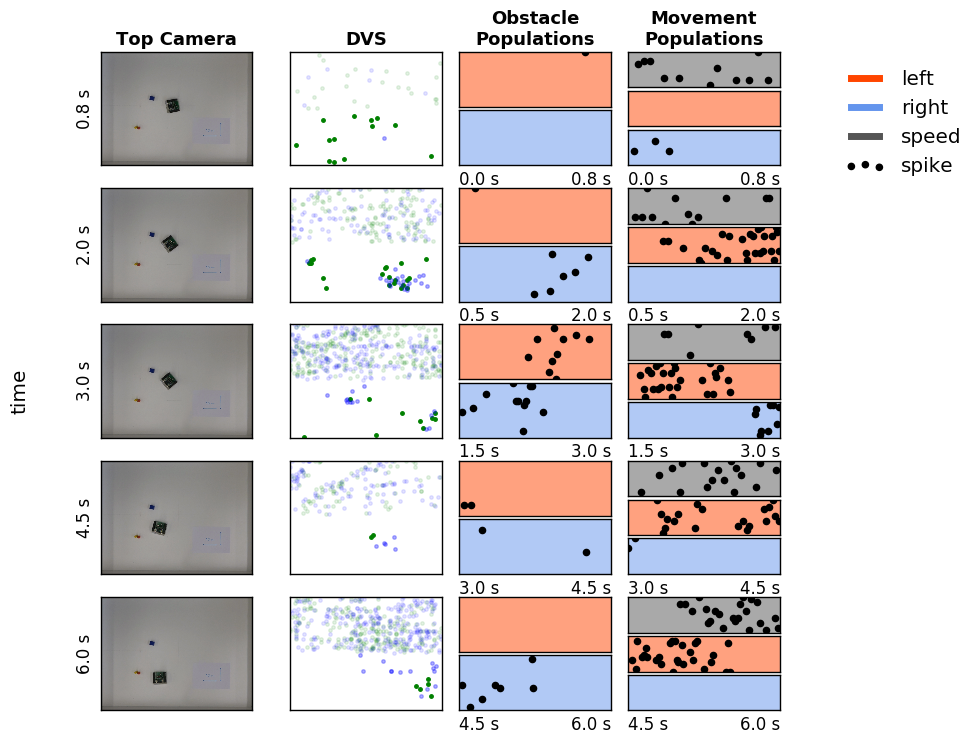

In [123]:
# edvs prints
timestamps = [800, 2000, 3000, 4500, 6000]

time_window = 1500

def edvs_image(timestamp):
    # get current axis
    ax = plt.gca()
    # get data
    data = exp.df_edvs[exp.df_edvs['timestamp'] > timestamp - 1000][exp.df_edvs['timestamp'] < timestamp]
    plot_dvs(data, timestamp, off_events=True)
    ax.set_xticks([])
    ax.set_yticks([])
    
    """
    on_events = data[data['pol'] == 1]
    off_events = data[data['pol'] == 0]
    # plot
    ax.scatter(on_events['x'], on_events['y'], c='green', marker='.')
    ax.scatter(off_events['x'], off_events['y'], c='red', marker='.')
    #style
    ax.set_axis_bgcolor('white')
    ax.set_xlim(0, 128)
    ax.set_ylim(0, 128)
    ax.set_xticks([])
    ax.set_yticks([])
    # add rectangle for obstacle view window
    ax.add_patch(patches.Rectangle((23, 0),
        104-23,
        65,
        fill=False      # remove background
    )
    """
    
def spike_train(timestamp, lower, upper):
    
    # get current axis
    ax = plt.gca()
    # get data
    data = exp.df_rolls[exp.df_rolls['timestamp'] > timestamp - time_window][exp.df_rolls['timestamp'] < timestamp]\
        [exp.df_rolls['neuron'] >= lower][exp.df_rolls['neuron'] <= upper]
    # plot
    plt.scatter(data['timestamp'], data['neuron'], color='black', label='spike')
    ax.set_xlim(max(0, timestamp - time_window), timestamp)
    ax.set_ylim(lower, upper)
    ax.set_xticks([])
    ax.set_yticks([])
    

fig = plt.figure(figsize=(2*(len(timestamps)), 1.7*(len(timestamps)))) 
gs = gridspec.GridSpec(len(timestamps), 1) 
gs.update(left=0.1, right=0.8,wspace=0.5, hspace=0.2)

col_title_style = {
    #'va': 'center',
    #'ha': 'center',
    'size': '13',
    'weight': 'bold'
}

common_y_axis = {
    'va': 'center',
    'rotation': 'vertical',
    'size': 'x-large'
}

label_style = {
    'size': 'large'
}

fig.patch.set_facecolor('white')



for i in range(len(timestamps)):
    
    row_grid = gridspec.GridSpecFromSubplotSpec(6, 4, subplot_spec=gs[i, :],
                                               width_ratios=[1.27, 1, 1, 1],
                                               hspace=0.2, wspace=0.1)
    
    last_row = i+1 == len(timestamps)
    first_row = i == 0
    
    #image
    img = img=mpimg.imread(snap_folder + '/%s_%d.png' % (exp.experiment_name, i+1))
    aximg = plt.subplot(row_grid[:, 0])
    plt.imshow(img)
    aximg.set_xticks([])
    aximg.set_yticks([])
    aximg.set_ylabel("{:.1f} s".format(timestamps[i]/1000), **label_style)
    if (first_row):
        aximg.set_title('Top Camera', **col_title_style)
    
    
    # edvs
    plt.subplot(row_grid[:, 1])
    edvs_image(timestamps[i])
    if (first_row):
        plt.title('DVS', **col_title_style)

    # obstacle left
    obl = plt.subplot(row_grid[:3, 2])
    spike_train(timestamps[i], 16, 31)
    obl.patch.set_facecolor('#ff4500')
    obl.patch.set_alpha(0.5)
    #obstacle right
    obr = plt.subplot(row_grid[3:, 2])
    spike_train(timestamps[i], 0, 15)
    obr.patch.set_facecolor('#6495ed')
    obr.patch.set_alpha(0.5)
    obr.set_xticks([max(timestamps[i]-time_window, 0), timestamps[i]])
    obr.set_xticklabels(['{:.1f} s'.format(x/1000) for x in obr.get_xticks()], **label_style)
    obr.xaxis.get_majorticklabels()[0].set_horizontalalignment('left')
    obr.xaxis.get_majorticklabels()[1].set_horizontalalignment('right')
    if (first_row):
        obl.set_title('Obstacle\nPopulations', **col_title_style)

    # speed populations
    sp = plt.subplot(row_grid[:2, 3])
    spike_train(timestamps[i], 64, 79)
    sp.patch.set_facecolor('#555555')
    sp.patch.set_alpha(0.5)
    # turn left
    tr = plt.subplot(row_grid[2:4, 3])
    spike_train(timestamps[i], 48, 63)
    tr.patch.set_facecolor('#ff4500')
    tr.patch.set_alpha(0.5)
    # turn right
    tl = plt.subplot(row_grid[4:, 3])
    spike_train(timestamps[i], 32, 47)
    tl.patch.set_facecolor('#6495ed')
    tl.patch.set_alpha(0.5)
    tl.set_xticks([max(timestamps[i]-time_window, 0), timestamps[i]])
    tl.set_xticklabels(['{:.1f} s'.format(x/1000) for x in tl.get_xticks()], **label_style)
    tl.xaxis.get_majorticklabels()[0].set_horizontalalignment('left')
    tl.xaxis.get_majorticklabels()[1].set_horizontalalignment('right')
    if (first_row):
        sp.set_title('Movement\nPopulations', **col_title_style)
    
#this plot is just for the legend
plt.plot(0, 0, color='#ff4500', label='left', lw=5)
plt.plot(1, 1, color='#6495ed', label='right', lw=5)
plt.plot(0.5, 0.5, color="#555555", label='speed', lw=5)
leg = plt.legend(bbox_to_anchor=(1, 0.9), bbox_transform=plt.gcf().transFigure, prop={'size':'x-large'})
#leg = plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
#           ncol=2, mode="expand", borderaxespad=0.05)
leg.get_frame().set_linewidth(0.0)

#fig.text(0.230, 0.95, 'Top Camera', **col_title_style)
##fig.text(0.439, 0.95, 'DVS', **col_title_style)
#fig.text(0.629, 0.95, 'Obstacle\nPopulations', **col_title_style)
#fig.text(0.816, 0.95, 'Movement\nPopulations', **col_title_style)

fig.text(0.03, 0.5, 'time', **common_y_axis)
plt.show()

save_dir = raw_dir + exp.experiment_name
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

fig.savefig("{}/{}_time_series.pdf".format(save_dir, exp.experiment_name), dpi=90)

In [114]:
def plot_dvs(data, time, off_events=False, 
             show_hist=True, normalize_hist=False, save=False):
    interval = 1500
    df = data
    ts_start= time - interval
    
    cIndex = np.logical_and(df['timestamp'] >= ts_start, df['timestamp'] <= ts_start + interval)

    plot_index = np.logical_and(cIndex, df['pol'] == 1)
    data = df[plot_index]
    lower_half_on = np.logical_and(plot_index, df['y'] <= 64)

    plot_index = np.logical_and(cIndex, df['pol'] == 0)
    data_off = df[plot_index]
    lower_half_off = np.logical_and(plot_index, df['y'] <= 64)
 
    ax0 = plt.gca()
    # first plot events in the upper half with a smaller alpha
    ax0.scatter(data['x'][data['y']>64], data['y'][data['y']>64], 
                c='g', marker='.', edgecolors='g', s=25, alpha=0.1)
#         if off_events:
    ax0.scatter(data_off['x'][data_off['y']>64], data_off['y'][data_off['y']>64], 
                c='b', marker='.', edgecolors='b', s=25, alpha=0.1)
    ax0.scatter(data['x'][data['y']<64], data['y'][data['y']<64], 
                c='g', marker='.', edgecolors='g', s=25, alpha=1)
    if off_events:
        ax0.scatter(data_off['x'][data_off['y']<64], data_off['y'][data_off['y']<64], 
                    c='b', marker='.', edgecolors='b', s=25, alpha=0.3)

    #ax0.set_axis_bgcolor('black')
    ax0.set_xlim(0, 128)
    ax0.set_ylim(0, 128)
    
#     plt.vlines(24, 0, 64, linewidth=3, linestyle='-', color='#696969')
#     plt.vlines(104, 0, 64, linewidth=3, linestyle='-', color='#696969')
    #ax0.set_xticks(range(0, 129, 16))
    #ax0.set_yticks(range(0, 129, 16))
    #ax0.get_yaxis().set_tick_params(direction='in')
    #ax0.get_xaxis().set_tick_params(direction='in')
    #ax0.set_yticks((0, 64, 128))
    #ax0.set_xticks((0, 64, 128))
    #ax0.set_title('EDVS', fontsize=18)
    # mark the 3 subregions for CA dicision
#         plt.subplots_adjust() 

,left,right,forward_velocity,angular_velocity
timestamp,,,,
11291,-3,9,5.7,98.04
13883,18,18,34.2,0.00
